## Ejercicio 8.2 (p.480)

### Enunciado

Se requiere desarrollar un programa con interfaz gráfica de usuario que
genere una ventana donde se solicite el ingreso de cinco notas obtenidas
por un estudiante.
El programa debe calcular y mostrar en la parte inferior de la ventana
los siguientes datos:
- El promedio de notas ingresadas.
- La desviación estándar de las notas ingresadas.
- La mayor nota obtenida.
- La menor nota obtenida.

##### Formula para el calculo de la desviación estándar 

$$ \sigma = \sqrt{\sum(x_i-\mu)^2 \over N} $$

- $ \sigma $ = desviación estándar
- $ N $ = tamaño de la lista
- $ x_i $ = cada valor de la lista
- $ \mu $ = media de los valores de la lista

### Diagrama de Clases

```mermaid
classDiagram
    class Notas {
        listado_notas: list[float]
        «constructor»Notas()
        calcular_promedio() float
        calcular_desviacion_estandar() float
        mayor() float
        menor() float
    }
    class VentanaPrincipal {
        root: Tk
        notas: Notas
        «constructor»VentanaPrincipal()
        crear_widgets()
        calcular_notas()
    }
    VentanaPrincipal --> Notas
```

### Solución

#### Definición de clases

In [13]:
import math
from tkinter import *
from tkinter import ttk

class Notas:
    listado_notas: list[float] = []

    def __init__(self):
        self.listado_notas = [0 for _ in range(5)]

    def calcular_promedio(self) -> float:
        return sum(self.listado_notas) / len(self.listado_notas)
    
    def calcular_desviacion_estandar(self) -> float:
        promedio = self.calcular_promedio()
        varianza = sum((nota - promedio) ** 2 for nota in self.listado_notas) / len(self.listado_notas)
        return math.sqrt(varianza)
    
    def mayor(self) -> float:
        return max(self.listado_notas)

    def menor(self) -> float:
        return min(self.listado_notas)

class VentanaPrincipal:
    def __init__(self):
        self.root = Tk()
        self.root.title("Calculadora de Notas")
        self.notas = Notas()
        
        self.crear_widgets()

    def crear_widgets(self):
        # Se crea un LabelFrame para agrupar los widgets relacionados con las notas
        notas_label_frame = ttk.LabelFrame(self.root, text="Notas")
        notas_label_frame.grid(row=0, column=0, columnspan=2, padx=10, pady=10)

        # Se crean etiquetas e inputs para las 5 notas
        self.labels = [ttk.Label(notas_label_frame, text=f"Nota {i+1}:") for i in range(5)]
        self.entries = [ttk.Entry(notas_label_frame) for _ in range(5)]
        
        for i in range(5):
            self.labels[i].grid(row=i, column=0, padx="10", pady="5")
            self.entries[i].grid(row=i, column=1, padx="0 70")

        # Botón para calcular las notas
        self.calculate_button = ttk.Button(self.root, text="Calcular", command=self.calcular_notas)
        self.calculate_button.grid(row=5, column=0)

        # Botón para limpiar las entradas
        self.clear_button = ttk.Button(self.root, text="Limpiar", command=self.limpiar_entradas)
        self.clear_button.grid(row=5, column=1)

        # Crear el contenedor de resultados una sola vez
        self.resultado_label_frame = ttk.LabelFrame(self.root, text="Resultados")
        self.resultado_label_frame.grid(row=6, column=0, columnspan=2, padx=10, pady=10)
        self.result_label = ttk.Label(self.resultado_label_frame, text="", justify=LEFT)
        self.result_label.grid(row=6, column=0, columnspan=2, padx=10, pady=10, sticky=W)

    def calcular_notas(self):
        # Se obtienen las notas de los inputs y se actualiza el listado de notas
        for i in range(len(self.notas.listado_notas)):
            try:
                nota = float(self.entries[i].get())
                self.notas.listado_notas[i] = nota
            except ValueError:
                pass

        promedio = self.notas.calcular_promedio()
        desviacion_estandar = self.notas.calcular_desviacion_estandar()
        mayor = self.notas.mayor()
        menor = self.notas.menor()

        resultado_texto = (
            f"Promedio: {promedio:.2f}\n"
            f"Desviación estándar: {desviacion_estandar:.2f}\n"
            f"Mayor: {mayor:.2f}\n"
            f"Menor: {menor:.2f}"
        )

        self.result_label.config(text=resultado_texto)

    def limpiar_entradas(self):
        # Se limpian las entradas y el resultado
        for entry in self.entries:
            entry.delete(0, END)

        resultado_texto = (
            f"Promedio: 0.00\n"
            f"Desviación estándar: 0.00\n"
            f"Mayor: 0.00\n"
            f"Menor: 0.00"
        )
        self.result_label.config(text=resultado_texto)
        self.notas = Notas()


#### Ejecución del programa

In [16]:
my_calculator = VentanaPrincipal()

my_calculator.root.mainloop()

**Botón Calcular**

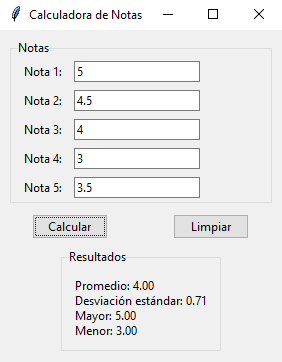

**Botón Limpiar**

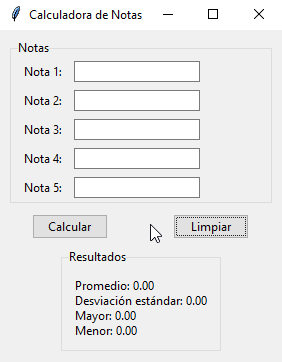